# Tutorial #15: Statistics II

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Say you have there's Poisson process gives you an average rate of 1.5 counts per second

- What is the probability of observing 0 counts in 1 second?
- What is the probability of observing 0 counts in 5 seconds?
- What is the probability of observing 1 counts in 1 second?
- What is the probability of observing more than 0 counts in 1 second?

Hint: Instead writing the full formula for the Poisson distribution you can use the function in
    
`stats.poisson`

`stats.poisson.pmf(N, mu)` will give you the PMF at N counts, given an expectation of mu counts

In [3]:
#Average rate of 1.5 counts per second
mu_1s = 1.5

#Probability of observing 0 counts in 1 second
p_0_1s = stats.poisson.pmf(0, mu_1s)

#Probability of observing 0 counts in 5 seconds
mu_5s = 1.5 * 5
p_0_5s = stats.poisson.pmf(0, mu_5s)

#Probability of observing 1 count in 1 second
p_1_1s = stats.poisson.pmf(1, mu_1s)

#Probability of observing more than 0 counts in 1 second
p_more_0_1s = 1 - stats.poisson.pmf(0, mu_1s)

print(f"Probability of 0 counts in 1 second: {p_0_1s}")
print(f"Probability of 0 counts in 5 seconds: {p_0_5s}")
print(f"Probability of 1 count in 1 second: {p_1_1s}")
print(f"Probability of more than 0 counts in 1 second: {p_more_0_1s}")

Probability of 0 counts in 1 second: 0.22313016014842982
Probability of 0 counts in 5 seconds: 0.0005530843701478336
Probability of 1 count in 1 second: 0.33469524022264474
Probability of more than 0 counts in 1 second: 0.7768698398515702


Let's make a fake image 

Let's make it with: 

- 15x15 pixels
- an average bkg rate of 10 counts/s in each pixel
- an exposure of 10 s


In [4]:
shape = (15,15)

true_bkg_rate = 10.0

exposure = 10.0

true_bkg_cnts = true_bkg_rate * exposure

image = np.random.poisson(true_bkg_cnts, size=(shape))

Now let's take a look at our image

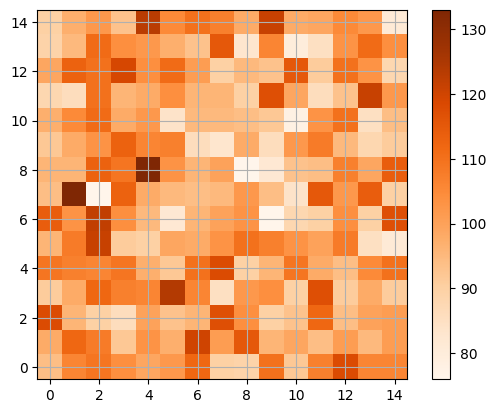

In [5]:
from matplotlib import cm
# feel free to pick your cmap
plt.imshow(image, origin='lower', interpolation='none', cmap=cm.Oranges)
plt.colorbar()
plt.grid(True)

Now let's inject some signal 

Let's make there be a signal at the middle pixel (7,7)

Let's assume our signal rate is 5 counts / s

In [6]:
true_signal_rate = 5.0

true_signal_count_avg = true_signal_rate*exposure

# get a random value from the Poisson dist
signal_counts = np.random.poisson(true_signal_count_avg)

# add this to the center pixel
image[7,7] += signal_counts

Now let's view it again

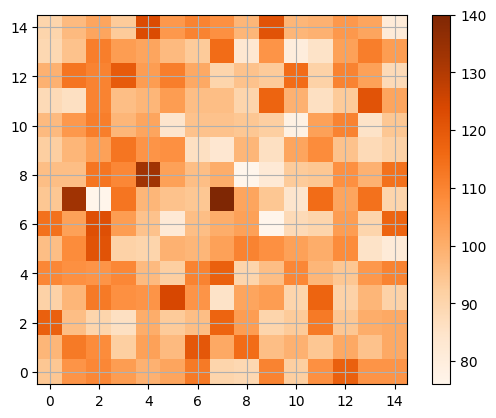

In [7]:
from matplotlib import cm
# feel free to pick your cmap
plt.imshow(image, origin='lower', interpolation='none', cmap=cm.Oranges)
plt.colorbar()
plt.grid(True)

Now let's pretend we don't actually know the true bkg and signal rates

and we want to measure the signal rate

So let's,

- estimate our average background 
- and our noise from background

In [12]:
# Estimate the average background and noise
average_background = np.mean(image)

#noise = sqrt(average_background)
background_noise = np.sqrt(average_background)

print(f"Estimated average background: {average_background}")
print(f"Estimated background noise: {background_noise}")

Estimated average background: 100.48444444444445
Estimated background noise: 10.024192957263166


Now let's get our bkg subtracted image by subtracting our average background from the image

Then plot it

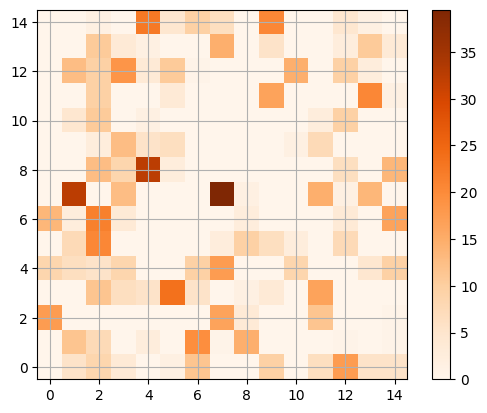

In [18]:
bkg_sub_image = np.copy(image).astype(np.float64)
bkg_sub_image -= average_background
bkg_sub_image[bkg_sub_image < 0] = 0

plt.imshow(bkg_sub_image, origin='lower', interpolation='none', cmap=cm.Oranges)
plt.colorbar()
plt.grid(True)


From this data, what is our estimate for the signal rate, and our 1 sigma error on that rate?

In [22]:
# lambda = (N - bkg_mean) / t
# sigma = sqrt(N)
rate = bkg_sub_image / exposure
sigma = np.sqrt(bkg_sub_image)

print(f"Rate: {np.mean(rate)}")
print(f"Sigma: {np.mean(sigma)}")

Rate: 0.43007999999999974
Sigma: 1.3205308933507007


Now let's calculate the S/N in each pixel, then plot that 

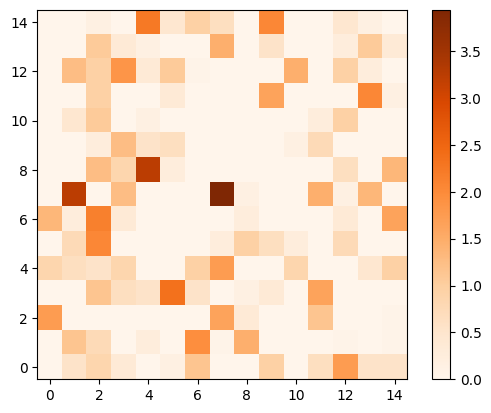

In [25]:
SNR =  bkg_sub_image / background_noise

plt.imshow(SNR, origin='lower', interpolation='none', cmap=cm.Oranges)
plt.colorbar()

Now let's look at our distribution of S/N values 

Let's make a histogram, but first let's "flatten" our image to make it a 1D list of values 

(array([188.,  28.,   6.]),
 array([0., 1., 2., 3.]),
 <BarContainer object of 3 artists>)

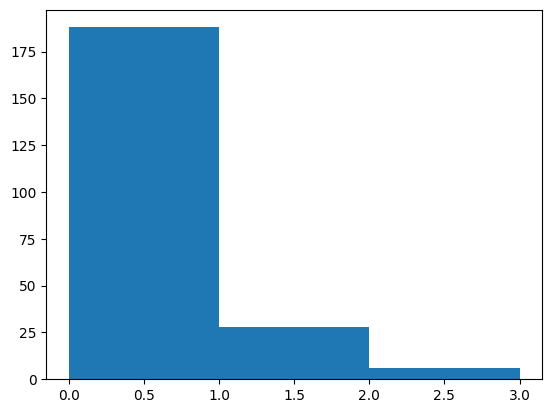

In [26]:
SNRs = SNR.ravel() # this reshapes a multi-D array to a 1D array

# make some bins that make sense to you
# you may want to check what the min and max values of SNRs is
bins = np.arange(0,4)

plt.hist(SNRs, bins=bins)

The SNR of the signal pixel is: 3.9420186466905562


- What's the SNR of our pixel with signal?
- Is it clearly detected? 

In [33]:
print(f"The SNR of the signal pixel is: {SNR[7,7]}") # ~3.9
SNR_z_score = (SNR[7,7] - np.mean(SNRs)) / np.std(SNRs)
print(f"The Z-score of the signal pixel is: {SNR_z_score}") # > 5

# The chance of a sigma 5.2 occurance happening
singal_SNR_prob = stats.norm.pdf(SNR_z_score, loc=0, scale=1)

print(f"The Signal is clearly detected because the chance of a sigma 5.2 occurance happening by chance are extremely low\n \
      normalPDF(z>5.2) = {singal_SNR_prob}") # ~3.9



The SNR of the signal pixel is: 3.9420186466905562
The Z-score of the signal pixel is: 5.217581363354878
The Signal is clearly detected because the chance of a sigma 5.2 occurance happening by chance are extremely low
       normalPDF(z>5.2) = 4.891893640831479e-07
